<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# CAMS global reanalysis of atmospheric composition (EAC4) - Dust Aerosol Optical Depth

### About

This notebook provides an introduction to [CAMS global reanalysis of atmospheric composition (EAC4)](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-reanalysis-eac4?tab=overview) and shows you how the variable `Nitrogen Dioxide` can be used to identify sources for air pollution. Nitrogen Dioxide is formed when fossil fuels such as coal, oil, gas or diesel are burned at high temperatures.

EAC4 (ECMWF Atmospheric Composition Reanalysis 4) is the fourth generation ECMWF global reanalysis of atmospheric composition. CAMS Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using a model of the atmosphere based on the laws of physics and chemistry. This principle, called data assimilation, is based on the method used by numerical weather prediction centres and air quality forecasting centres, where every so many hours (12 hours at ECMWF) a previous forecast is combined with newly available observations in an optimal way to produce a new best estimate of the state of the atmosphere, called analysis, from which an updated, improved forecast is issued. Reanalysis works in the same way to allow for the provision of a dataset spanning back more than a decade. Reanalysis does not have the constraint of issuing timely forecasts, so there is more time to collect observations, and when going further back in time, to allow for the ingestion of improved versions of the original observations, which all benefit the quality of the reanalysis product.

The notebook examines global Nitrogen Dioxide occurence for March 2022.


### Basic Facts

> **Spatial resolution**: `0.75° x 0.75°` <br>
> **Spatial coverage**: `Global` <br>
> **Temporal resolution**:  `3-hourly` <br>
> **Temporal coverage**: `2003 to 2022` <br>
> **Data format**: `GRIB` or `zipped NetCDF`


### How to access the data

CAMS global atmospheric composition reanalysis are available for download via the [Copernicus Atmosphere Data Store (ADS)](https://ads.atmosphere.copernicus.eu/). You will need to create an ADS account [here](https://ads.atmosphere.copernicus.eu/user/register).

Data from the ADS can be downloaded in two ways:
* `manually` via the [ADS web interface](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-reanalysis-eac4?tab=form)
* `programmatically` with a Python package called cdsapi ([more information](https://ads.atmosphere.copernicus.eu/api-how-to))

### Module outline
* [*Optional: Retrieve CAMS global atmospheric reanalysis programmatically*](#cams_cdsapi_global)
* [1 - Load and browse Nitrogen Dioxide values from the CAMS global reanalysis](#load_browse_cams_global)
* [2 - Retrieve the data variable Nitrogen Dioxide as xarray.DataArray](#data_retrieve_cams_global)
* [3 - Visualize Total Column Nitrogen Dioxide](#visualize_cams_global)
* [4 - Create a geographical subset for Asia](#subset_cams_global)
* [5 - Animate Nitrogen Dioxide changes over time](#animate_cams_global)

<hr>

#### Load required libraries

In [1]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='cams_cdsapi_global'></a>*Optional: Retrieve CAMS global atmospheric composition reanalysis programmatically*

The `CDS Application Program Interface (CDS API)` is a Python library which allows you to access data from the ADS `programmatically`. In order to use the CDS API, follow the steps below:

* [Self-register](https://ads.atmosphere.copernicus.eu/#!/home) at the ADS registration page (if you do not have an account yet)
* [Login](https://ads.atmosphere.copernicus.eu/user/login) to the ADS portal and go to the [api-how-to page](https://ads.atmosphere.copernicus.eu/api-how-to)
* Copy the CDS API key displayed in the black terminal window and replace the `######` of the `KEY` variable below with your individual CDS API key

**Note:** You find your CDS API key displayed in the black terminal box under the section `Install the CDS API key`. If you do not see a URL or key appear in the black terminal box, please refresh your browser tab. 

In [3]:
URL='https://ads.atmosphere.copernicus.eu/api/v2'
KEY='#################################'

<br>

The next step is then to request the data with a so called `API request`. Via the [ADS web interface](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-reanalysis?tab=form), you can select the data and at the end of the web interface, you can open the ADS request via `Show API request`. Copy the request displayed there in the cell below. Once you execute the cell, the download of the data starts automatically. You will see a new file called `20210204_duaod.nc` appear in the same folder as this notebook. This is for demonstration purposes only.

In [ ]:
import cdsapi

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-reanalysis-eac4',
    {
        'variable': 'total_column_nitrogen_dioxide',
        'date': '2022-03-01/2022-03-31',
        'time': [
            '00:00',
            '12:00',
        ],
        'format': 'netcdf',
    },
    '../../eodata/acam_training_school/CAMS/202203_no2.nc')

<br>

## <a id='load_browse_cams_global'></a>Load and browse CAMS global atmospheric composition reanalysis

CAMS global near-real-time forecast data is available either in `GRIB` or `netCDF`. The data for the present example has been downloaded as `netCDF`.

You can use xarray's function `xr.open_dataset()` to open the netCDF file as `xarray.Dataset`.

In [4]:
file = xr.open_dataset('../../eodata/acam_training_school/CAMS/202203_no2.nc')
file

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2022-03-01 ... 2022-03-31T12:00:00
Data variables:
    tcno2      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-18 14:21:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

<br>

The data above has three dimensions (`latitude`, `longitude`, `time`) and one data variable:
* `tcno2`: Total column Nitrogen Dioxide

Let us inspect the coordinates of the file more in detail.

Below, you see that the dataset consists of 62 time steps, ranging from 1 March 2023 00 UTC to 31 March 2023 12:00 UTC in a 6-hour timestep.

In [5]:
file.time

<xarray.DataArray 'time' (time: 62)>
array(['2022-03-01T00:00:00.000000000', '2022-03-01T12:00:00.000000000',
       '2022-03-02T00:00:00.000000000', '2022-03-02T12:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-03-03T12:00:00.000000000',
       '2022-03-04T00:00:00.000000000', '2022-03-04T12:00:00.000000000',
       '2022-03-05T00:00:00.000000000', '2022-03-05T12:00:00.000000000',
       '2022-03-06T00:00:00.000000000', '2022-03-06T12:00:00.000000000',
       '2022-03-07T00:00:00.000000000', '2022-03-07T12:00:00.000000000',
       '2022-03-08T00:00:00.000000000', '2022-03-08T12:00:00.000000000',
       '2022-03-09T00:00:00.000000000', '2022-03-09T12:00:00.000000000',
       '2022-03-10T00:00:00.000000000', '2022-03-10T12:00:00.000000000',
       '2022-03-11T00:00:00.000000000', '2022-03-11T12:00:00.000000000',
       '2022-03-12T00:00:00.000000000', '2022-03-12T12:00:00.000000000',
       '2022-03-13T00:00:00.000000000', '2022-03-13T12:00:00.000000000',
       '2022-03-14T00:00:00.000000000', '2022-03-14T12:00:00.000000000',
       '2022-03-15T00:00:00.000000000', '2022-03-15T12:00:00.000000000',
       '2022-03-16T00:00:00.000000000', '2022-03-16T12:00:00.000000000',
       '2022-03-17T00:00:00.000000000', '2022-03-17T12:00:00.000000000',
       '2022-03-18T00:00:00.000000000', '2022-03-18T12:00:00.000000000',
       '2022-03-19T00:00:00.000000000', '2022-03-19T12:00:00.000000000',
       '2022-03-20T00:00:00.000000000', '2022-03-20T12:00:00.000000000',
       '2022-03-21T00:00:00.000000000', '2022-03-21T12:00:00.000000000',
       '2022-03-22T00:00:00.000000000', '2022-03-22T12:00:00.000000000',
       '2022-03-23T00:00:00.000000000', '2022-03-23T12:00:00.000000000',
       '2022-03-24T00:00:00.000000000', '2022-03-24T12:00:00.000000000',
       '2022-03-25T00:00:00.000000000', '2022-03-25T12:00:00.000000000',
       '2022-03-26T00:00:00.000000000', '2022-03-26T12:00:00.000000000',
       '2022-03-27T00:00:00.000000000', '2022-03-27T12:00:00.000000000',
       '2022-03-28T00:00:00.000000000', '2022-03-28T12:00:00.000000000',
       '2022-03-29T00:00:00.000000000', '2022-03-29T12:00:00.000000000',
       '2022-03-30T00:00:00.000000000', '2022-03-30T12:00:00.000000000',
       '2022-03-31T00:00:00.000000000', '2022-03-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-03-01 ... 2022-03-31T12:00:00
Attributes:
    long_name:  time

The latitude values have a 0.75 degrees resolution and have a global N-S coverage.

In [6]:
file.latitude

<xarray.DataArray 'latitude' (latitude: 241)>
array([ 90.  ,  89.25,  88.5 , ..., -88.5 , -89.25, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

The longitude values have a 0.75 degrees resolution as well, and are disseminated in a [0, 360] grid. 

In [7]:
file.longitude

<xarray.DataArray 'longitude' (longitude: 480)>
array([  0.  ,   0.75,   1.5 , ..., 357.75, 358.5 , 359.25], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
Attributes:
    units:      degrees_east
    long_name:  longitude

Above, you see that the `longitude` variables are in the range of `[0, 359.6]`. Per default, ECMWF data are on a [0, 360] grid. Let us bring the longitude coordinates to a `[-180, 180]` grid. You can use the xarray function `assign_coords()` to assign new values to coordinates of a xarray data arra. The code below shifts your longitude coordinates from `[0, 359.6]` to `[-180, 179.6]`.

In [8]:
file = file.assign_coords(longitude=(((file.longitude + 180) % 360) - 180)).sortby('longitude')
file

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 62)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2022-03-01 ... 2022-03-31T12:00:00
Data variables:
    tcno2      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-18 14:21:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Note that data disseminated in 2022 onwards may be already regridded onto a [-180, 180] grid, so you can skip this step if your data is already regridded.

## <a id='data_retrieve_cams_global'></a>Retrieve the variable *Nitrogen Dioxide* as data array

Let us extract from the dataset above the data variable `Total Column Nitrogen Dioxide` as `xarray.DataArray` with the name `tcno2`. You can load a data array from a xarray dataset by specifying the name of the variable (`tcno2`) in square brackets.

In [9]:
tcno2 = file['tcno2']
tcno2

<xarray.DataArray 'tcno2' (time: 62, latitude: 241, longitude: 480)>
[7172160 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2022-03-01 ... 2022-03-31T12:00:00
Attributes:
    units:          kg m**-2
    long_name:      Total column Nitrogen dioxide
    standard_name:  atmosphere_mass_content_of_nitrogen_dioxide

Above, you see that the variable `tcno2` has three attributes, `units`, `long_name` and `standard_name`. Let us define variables for `units` and `long_name` attributes. The variables can be used later for visualizing the data.

In [10]:
long_name = tcno2.long_name
units = tcno2.units

Let us do the same for the coordinates `longitude` and `latitude`.

In [11]:
latitude = tcno2.latitude
longitude = tcno2.longitude

<br>

## <a id='visualize_cams_global'></a>Visualize *Total Column Nitrogen Dioxide*

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot.

In [11]:
?visualize_pcolormesh

Signature:
visualize_pcolormesh(
    data_array,
    longitude,
    latitude,
    projection,
    color_scale,
    unit,
    long_name,
    vmin,
    vmax,
    set_global=True,
    lonmin=-180,
    lonmax=180,
    latmin=-90,
    latmax=90,
)
Docstring:
Visualizes a xarray.DataArray with matplotlib's pcolormesh function.

Parameters:
    data_array(xarray.DataArray): xarray.DataArray holding the data values
    longitude(xarray.DataArray): xarray.DataArray holding the longitude values
    latitude(xarray.DataArray): xarray.DataArray holding the latitude values
    projection(str): a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
    color_scale(str): string taken from matplotlib's color ramp reference
    unit(str): the unit of the parameter, taken from the NetCDF file if possible
    long_name(str): long name of the parameter, taken from the NetCDF file if possible
    vmin(int): minimum number on visualisation legend
    vmax(int): maximum number on visualisation

You can make use of the variables we defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the `color scale` and minimum (`vmin`) and maxium (`vmax`) data values.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Total column Nitrogen dioxide 2022-03-01T00:00:00'}>)

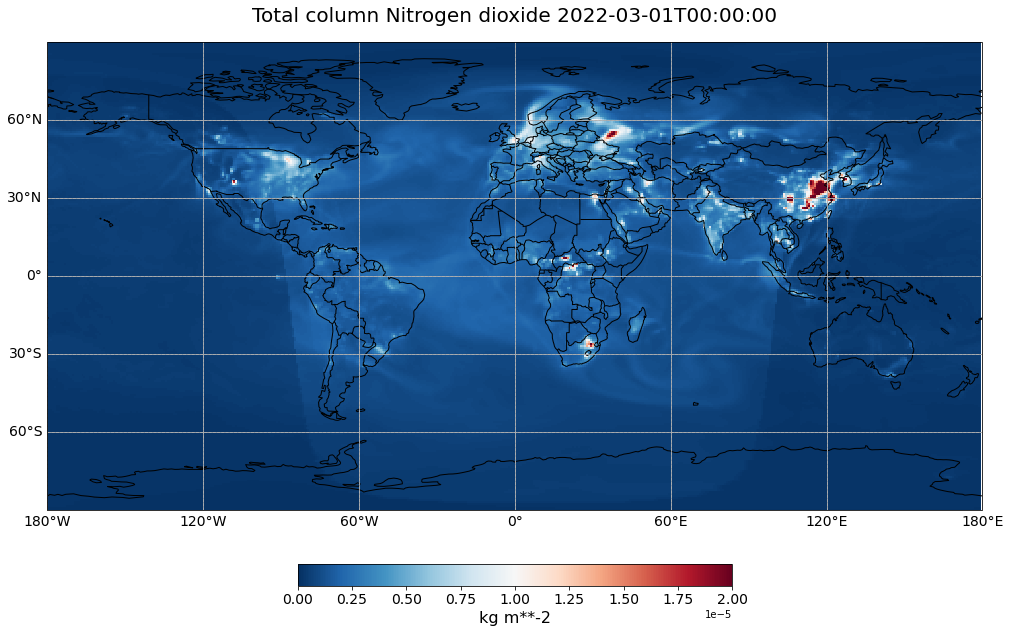

In [12]:
time_index = 0
visualize_pcolormesh(data_array=tcno2[time_index,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='RdBu_r',
                     unit=units,
                     long_name=long_name + ' ' + str(tcno2[time_index,:,:].time.data)[0:19],
                     vmin=0, 
                     vmax=2*1e-5)

<br>

## <a id='subset_cams_global'></a>Create a geographical subset for Asia

The map above shows the Total Column Nitrogen Dioxide globally. Let us create a geographical subset for Asia, in order to better analyse air pollution there.

For geographical subsetting, you can use the function [generate_geographical_subset](../functions.ipynb#generate_geographical_subset). You can use `?generate_geographical_subset` to open the docstring in order to see the function's keyword arguments.

In [13]:
?generate_geographical_subset

Signature:
generate_geographical_subset(
    xarray,
    latmin,
    latmax,
    lonmin,
    lonmax,
    reassign=False,
)
Docstring:
Generates a geographical subset of a xarray.DataArray and if kwarg reassign=True, shifts the longitude grid 
from a 0-360 to a -180 to 180 deg grid.

Parameters:
    xarray(xarray.DataArray): a xarray DataArray with latitude and longitude coordinates
    latmin, latmax, lonmin, lonmax(int): lat/lon boundaries of the geographical subset
    reassign(boolean): default is False
    
Returns:
    Geographical subset of a xarray.DataArray.
File:      /tmp/ipykernel_823/3979307327.py
Type:      function


Define the bounding box information for Europe

In [13]:
latmin = 0.
latmax = 60.
lonmin = 60.
lonmax = 160.

Now, let us apply the function [generate_geographical_subset](../functions.ipynb#generate_geographcial_subset) to subset the `tcno2` xarray.DataArray. Let us call the new `xarray.DataArray` `tcno2_subset`.

In [14]:
tcno2_subset = generate_geographical_subset(xarray=tcno2, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
tcno2_subset

<xarray.DataArray 'tcno2' (time: 62, latitude: 79, longitude: 133)>
array([[[2.1984961e-06, 2.2603344e-06, 2.1226952e-06, ...,
         3.9321458e-07, 3.9122096e-07, 3.9520819e-07],
        [2.6333582e-06, 2.5236441e-06, 2.4338806e-06, ...,
         4.0518353e-07, 3.9321458e-07, 3.8922735e-07],
        [3.6068159e-06, 3.3893812e-06, 3.2437674e-06, ...,
         4.6303467e-07, 4.2912143e-07, 3.9122096e-07],
        ...,
        [1.2310265e-06, 1.2310265e-06, 1.2210512e-06, ...,
         3.8922735e-07, 4.0518353e-07, 3.8723374e-07],
        [1.2390083e-06, 1.2370074e-06, 1.2270393e-06, ...,
         3.4334516e-07, 3.5930861e-07, 3.6927668e-07],
        [1.2330202e-06, 1.2270393e-06, 1.2150704e-06, ...,
         3.5332050e-07, 3.6728306e-07, 3.7725840e-07]],

       [[1.1213124e-06, 1.1372686e-06, 9.8965393e-07, ...,
         1.0096046e-06, 1.0056174e-06, 1.0175863e-06],
        [1.3267781e-06, 1.2729142e-06, 1.2390083e-06, ...,
         1.0195799e-06, 1.0175863e-06, 1.0355361e-06],
        [2.2284221e-06, 2.0608568e-06, 1.8434221e-06, ...,
         1.0614676e-06, 1.0534932e-06, 1.0455115e-06],
...
        [1.4005855e-06, 1.3985918e-06, 1.3965910e-06, ...,
         3.9122096e-07, 4.1515887e-07, 4.2513420e-07],
        [1.4105535e-06, 1.4105535e-06, 1.4145480e-06, ...,
         4.1515887e-07, 4.2912143e-07, 4.3310865e-07],
        [1.4185352e-06, 1.4085599e-06, 1.4145480e-06, ...,
         4.4308399e-07, 4.4907210e-07, 4.5704655e-07]],

       [[1.8294595e-06, 1.9371801e-06, 1.9192303e-06, ...,
         1.2110759e-06, 1.2011078e-06, 1.2050950e-06],
        [1.9331928e-06, 2.1406449e-06, 2.3421235e-06, ...,
         1.2310265e-06, 1.2190576e-06, 1.2230448e-06],
        [2.9984076e-06, 3.5130579e-06, 4.0396844e-06, ...,
         1.2749151e-06, 1.2429955e-06, 1.2190576e-06],
        ...,
        [6.7647488e-07, 6.7049405e-07, 6.6051871e-07, ...,
         1.3068275e-06, 1.3447279e-06, 1.3826284e-06],
        [6.9443195e-07, 6.9043745e-07, 6.8645022e-07, ...,
         1.2908713e-06, 1.3227836e-06, 1.3527097e-06],
        [7.0839451e-07, 7.0440001e-07, 7.0240640e-07, ...,
         1.2769087e-06, 1.2868768e-06, 1.2908713e-06]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.75 61.5 62.25 63.0 ... 158.2 159.0 159.8
  * latitude   (latitude) float32 59.25 58.5 57.75 57.0 ... 3.0 2.25 1.5 0.75
  * time       (time) datetime64[ns] 2022-03-01 ... 2022-03-31T12:00:00
Attributes:
    units:          kg m**-2
    long_name:      Total column Nitrogen dioxide
    standard_name:  atmosphere_mass_content_of_nitrogen_dioxide

Let us visualize the subsetted `xarray.DataArray` again. This time, you set the `set_global` kwarg to `False` and you specify the longitude and latitude bounds specified above.

Additionally, in order to have the time information as part of the title, we add the string of the datetime information to the `long_name` variable: `long_name + ' ' + str(du_aod_subset[##,:,:].time.data)[0:19]`.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Total column Nitrogen dioxide 2022-03-01T00:00:00'}>)

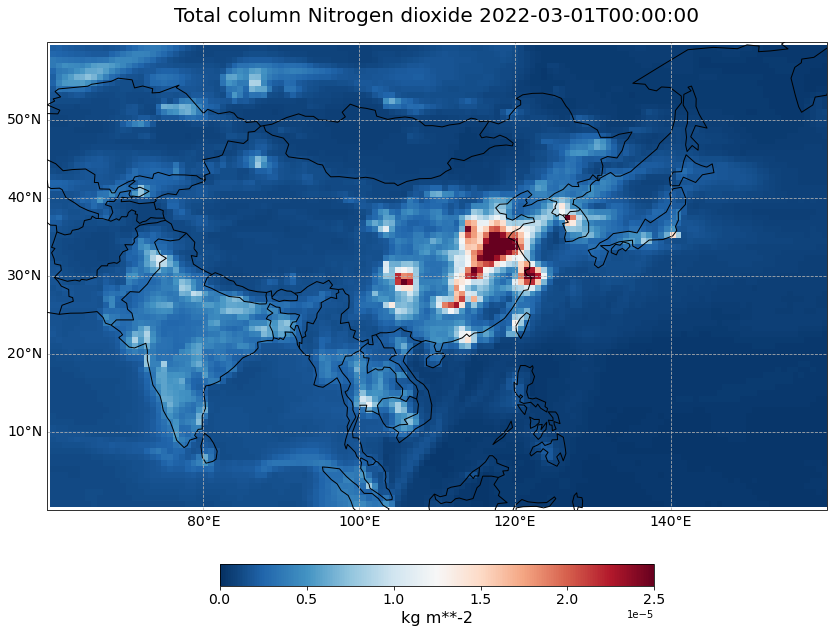

In [15]:
time_index = 0
visualize_pcolormesh(data_array=tcno2_subset[time_index,:,:],
                     longitude=tcno2_subset.longitude,
                     latitude=tcno2_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='RdBu_r',
                     unit=units,
                     long_name=long_name + ' ' + str(tcno2_subset[time_index,:,:].time.data)[0:19],
                     vmin=0, 
                     vmax=2.5*1e-5,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

## <a id='animate_cams_global'></a>Animate changes of *Total Column Nitrogen Dioxide* over time

In the last step, you can animate the `Total Column Nitrogen Dioxide` in order to see how the trace gas emissions change over the month March 2022.

You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [16]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=tcno2_subset[0,:,:],
                               longitude=tcno2_subset.longitude, 
                               latitude=tcno2_subset.latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='RdBu_r', 
                               unit='-',
                               long_name=long_name + ' '+ str(tcno2_subset.time[0].data)[0:19],
                               vmin=0,
                               vmax=2.5*1e-5, 
                               lonmin=lonmin, 
                               lonmax=lonmax, 
                               latmin=latmin, 
                               latmax=latmax,
                               set_global=False)

frames = 61

def draw(i):
    img = plt.pcolormesh(tcno2_subset.longitude, 
                         tcno2_subset.latitude, 
                         tcno2_subset[i,:,:], 
                         cmap='RdBu_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=2.5*1e-5,
                         shading='auto')
    
    ax.set_title(long_name + ' '+ str(tcno2_subset.time[i].data)[0:19], fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

<br>

#### Play the animation video as HTML5 video

In [17]:
HTML(ani.to_html5_video())

<hr>

### References

* Copernicus Service information 2023
* Generated using Copernicus Atmosphere Monitoring Service Information 2023

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>